In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json, time, datetime, math

now = datetime.datetime.now()
ROOT_PATH = 'data/'
DATA_PATH = '-'.join(str(x) for x in [(now.year), now.month, now.day])
LOAD_DATA_PATH = '2018-2-5'

def print_time(msg, unix):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

def print_progress(iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, errors = 0, fill = '+'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s - errors: %s' % (prefix, bar, percent, suffix, errors), end = '\r')
    # Print New Line on Complete
    if iteration == (total - 2): 
        print()

In [3]:
submissions = pd.read_pickle(ROOT_PATH + LOAD_DATA_PATH + '/' + 'submissions.pkl')
comments = pd.read_pickle(ROOT_PATH + LOAD_DATA_PATH + '/' + 'comments.pkl')
submissions = submissions.query('subreddit=="Bitcoin"')

In [4]:
#we only use bitcoin subreddit for now
authors_1 = pd.DataFrame({
    'author': submissions['author']
})

authors_2 = pd.DataFrame({
    'author': comments['author']
}) 

authors = pd.concat([authors_1, authors_2]).drop_duplicates().reset_index(drop=True)
#authors.info()
#comments.columns

num_comments = comments[comments['parent_id'].str.contains('t1_')]['id'].count()
num_links = comments[comments['parent_id'].str.contains('t3_')]['id'].count()

print('num_comments:', num_comments)
print('num_links:', num_links)
print('total:', comments['id'].count())

comments[['parent_type','parent_id']] = comments['parent_id'].str.split('_',expand=True)

num_comments: 133462
num_links: 47098
total: 180560


In [5]:
edges = pd.DataFrame(columns=['author_1', 'edge','author_2'])
edges

edges_sub = pd.merge(comments[comments['parent_type'] == 't3'].reset_index(), submissions, left_on='parent_id', right_on='id', how='left', suffixes=('_com', '_sub'))
#print(edges_sub[['author_com']])

#print(edges_sub.columns)
#print(edges_sub[['author_com', 'score_com', 'score_sub', 'author_sub']].sort_values(by='score_sub', ascending=False).reset_index(drop=True))


In [6]:
#g = nx.MultiDiGraph()
#g.add_nodes_from(authors['author'].values)
g = nx.from_pandas_dataframe(edges_sub, 'author_com', 'author_sub', ['score_sub', 'id_com', 'id_sub', 'title'], create_using=nx.MultiDiGraph())

print(len(g.edges()))
g['balcon']['kdadw91']

47098


AtlasView({0: {'score_sub': 0, 'id_com': 'dss8tyo', 'id_sub': '7qvn3l', 'title': 'How I lost my college fund.'}})

In [7]:
import operator
def sorted_map(map):
    ms = sorted(map.items(), key=operator.itemgetter(1), reverse=True)
    return ms

print(nx.info(g))
deg_cen = sorted_map(nx.degree_centrality(g))
max_num = 30
print(30*'-')
print(deg_cen[0:max_num])

Name: 
Type: MultiDiGraph
Number of nodes: 19842
Number of edges: 47098
Average in degree:   2.3737
Average out degree:   2.3737
------------------------------
[('rBitcoinMod', 0.245501738823648), ('[deleted]', 0.13532584043142987), ('BluntLord', 0.04657023335517363), ('B3nGG', 0.03835492162693412), ('lriccardo', 0.025956353006400888), ('xcryptogurux', 0.01884985635804647), ('trance929', 0.01769064059271206), ('Bastiat', 0.01769064059271206), ('Tricky_Troll', 0.01769064059271206), ('pc_to_mac_user', 0.017589839221813418), ('entrepreneurharshita', 0.01688422962552291), ('Xtreme110', 0.01592661660198579), ('suasponte26', 0.015271407691144599), ('Baddy3shoez', 0.01431379466760748), ('BTCMONSTER', 0.01411219192581019), ('wallyjo3', 0.014061791240360869), ('lawmaster99', 0.013456983014969004), ('PineappleFund', 0.013305780958621036), ('lewjc', 0.012549770676881206), ('TheGreatMuffin', 0.012448969305982561), ('domelane', 0.01239856862053324), ('Bitzone4', 0.01239856862053324), ('Bitcoin_Bug'

In [136]:
closeness_cen = sorted_map(nx.closeness_centrality(g))
print(30*'-')
print(closeness_cen[0:max_num])

------------------------------
[('rBitcoinMod', 0.19557143607819016), ('B3nGG', 0.1707823868390866), ('Bastiat', 0.16228423928098482), ('pc_to_mac_user', 0.16140778274274453), ('BluntLord', 0.15918803662595457), ('Bitzone4', 0.1576533452314706), ('bitcoine4', 0.1567622456088645), ('grade-ten_dropout', 0.15325726866155473), ('karamelitar', 0.1531242288703981), ('sagar6191', 0.15303582500011206), ('CrazedIndividual', 0.15252751493345917), ('arbooe', 0.15215956768368), ('Mikeross14', 0.15206584181244134), ('kindessissupreme', 0.1517419260936078), ('imstubbs2', 0.15160640580172388), ('dfrancouk', 0.15159575226826857), ('Icecream52', 0.15138673596195906), ('TiltMastery', 0.15137199264883913), ('obkenobi13', 0.1512267251909546), ('btckilledme', 0.1511970457342247), ('climbermat', 0.15114949744952824), ('ThermohydrometricKey', 0.1509048243341886), ('2481632641282565121k', 0.15083851726847688), ('ExactBtcTrading', 0.15057645716941553), ('datzuc_chini', 0.15031856487187437), ('AABCDS', 0.150308

In [137]:
betweenness_cen = sorted_map(nx.betweenness_centrality(g))
print(30*'-')
print(betweenness_cen[0:max_num])

------------------------------
[('rBitcoinMod', 0.013203621365340023), ('2481632641282565121k', 0.0033978271931842043), ('SonovaBitcoin', 0.002747240044858347), ('millsdmb', 0.002587044810911311), ('Bitcoin_Bug', 0.0024778258261275673), ('domelane', 0.0023778318333957248), ('CONTROLurKEYS', 0.0019915784031080026), ('goxedbux', 0.00198877660710321), ('BluntLord', 0.001987341857712401), ('forde250', 0.0018350502991616305), ('affirmed_78', 0.0017073513128279922), ('DesignerAccount', 0.001695879578795871), ('ghee99', 0.0015434063647653568), ('BitcoinZeroTeam', 0.001503700346017123), ('Tricky_Troll', 0.001415931523580898), ('B3nGG', 0.0013965322720510891), ('TheGreatMuffin', 0.001360718138508298), ('i_gotta_say', 0.001347943246515105), ('pg3crypto', 0.001310985800542468), ('FraggleRockRefugee', 0.001165765651825999), ('bitbat99', 0.001097726283277028), ('wallyjo3', 0.0010935958139476508), ('skydiveguy', 0.0010872765691357278), ('Miladran', 0.0010811297892897968), ('Bastiat', 0.0010773610606

In [138]:
data_df = pd.DataFrame({
    'degree_cen': dict(deg_cen),
    'betweenness_cen': dict(betweenness_cen),
    'closeness_cen': dict(closeness_cen) 
})

data_df.to_pickle(ROOT_PATH + LOAD_DATA_PATH + '/' + 'graph_data.pkl')

In [8]:
data_df = pd.read_pickle(ROOT_PATH + LOAD_DATA_PATH + '/' + 'graph_data.pkl')

1250
34


<IPython.core.display.Javascript object>


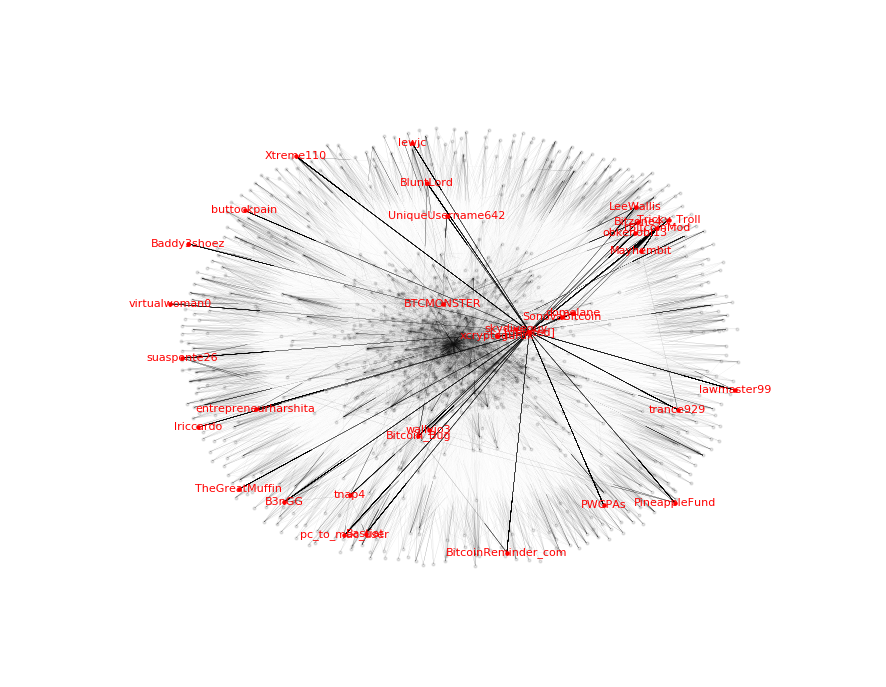

In [12]:
def trim_degrees(g, degree=1):
    g2 = g.copy()
    d = nx.degree(g2)
    for n in g.nodes():
        if d[n]<=degree:
            g2.remove_node(n)
    return g2

core = trim_degrees(g, degree=10)
print(len(core))
core2= trim_degrees(g, degree=150)
print(len(core2))

nx.draw_networkx(core, with_labels=False, font_size=9, font_color='b', width=0.05, node_size=4, alpha=0.1, node_color='black')
nx.draw_networkx(core2, with_labels=True, font_size=8, font_color='r', width=0.05, node_size=6)

plt.axis('off')
plt.show()